In [44]:
#Must figure out how to get the time and frequency arrays that correspond to the TOA residuals
#I think that they are located in the tempo.lis files, which I have saved as: tempo_factori.lis

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [133]:
#Importing the arrays, starting with factor64, this is almost fully time scrunched

#By default np.genfromtxt brings in consecutive white spaces as delimiters!
#col1=time, col2=frequency, col3=prefitresids
arrays_factor64 = np.genfromtxt('tempo_factor64.lis', skip_header=90, max_rows=1055, usecols=(1,4,7))

print arrays_factor64

TOA_64 = arrays_factor64[:,0] 
freq_64 = arrays_factor64[:,1]
resid_64 = arrays_factor64[:,2]

[[  5.59894415e+04   1.71679300e+03   0.00000000e+00]
 [  5.59894415e+04   1.63268000e+03  -0.00000000e+00]
 [  5.59894415e+04   1.52961900e+03  -0.00000000e+00]
 ..., 
 [  5.73876619e+04   2.07526000e+03   2.00000000e-03]
 [  5.73876619e+04   1.85497900e+03   2.00000000e-03]
 [  5.73876619e+04   1.80099100e+03   2.00000000e-03]]


In [174]:
#Define the colormap

from matplotlib.colors import LinearSegmentedColormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap=LinearSegmentedColormap.from_list('name', colors, 8)

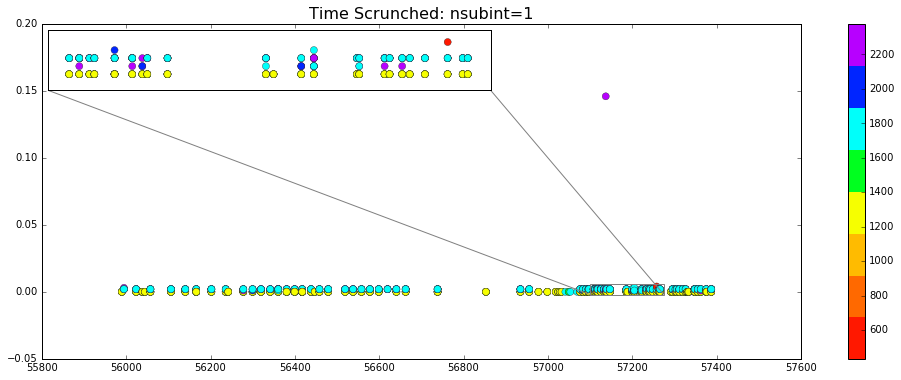

In [177]:
#Plot residual vs. MJD. (Time Scrunched to 1 subinterval)

#Create the plot and the adjoined color bar
fig,ax = plt.subplots(figsize=(17,6))
cax = ax.scatter(TOA_64, resid_64, c=freq_64, s=50, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('Time Scrunched: nsubint=1', fontsize='16')
fig.colorbar(cax, ticklocation)

#Creating the zoomed portion of the plot
axins = zoomed_inset_axes(ax, 6, loc=2) # zoom-factor: 2.5, location: upper-left
axins.scatter(TOA_64, resid_64, c=freq_64, s=50, edgecolor='#262626', linewidth='0.35', cmap=cmap)
x1, x2, y1, y2 = 57100, 57275, -0.002, 0.0055 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
plt.tick_params(axis='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')

mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5") #Draw the lines to the plot

plt.show()

In [27]:
#Importing arrays for factor2, almost has been partially scrunched so there are half the original time bins

arrays_factor2 = np.genfromtxt('tempo_factor2.lis', skip_header=90, max_rows=8870, usecols=(1,4,7))

print arrays_factor2

TOA_2 = arrays_factor2[:,0] 
freq_2 = arrays_factor2[:,1]
resid_2 = arrays_factor2[:,2]

[[  5.59894339e+04   1.71749900e+03   0.00000000e+00]
 [  5.59894339e+04   1.63269400e+03  -0.00000000e+00]
 [  5.59894339e+04   1.52928400e+03  -0.00000000e+00]
 ..., 
 [  5.73876705e+04   2.07568400e+03   2.00000000e-03]
 [  5.73876705e+04   1.85499900e+03   2.00000000e-03]
 [  5.73876705e+04   1.80109300e+03   1.00000000e-03]]


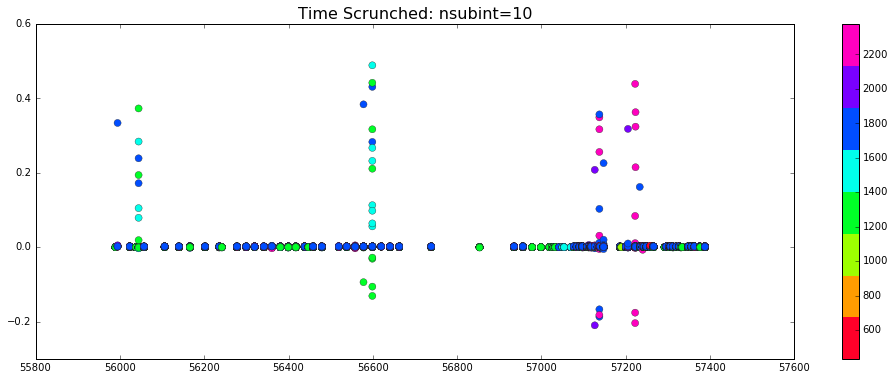

In [106]:
#Plot residual vs. MJD. (Time Scrunched in half to 10 subintervals)

cmap = plt.get_cmap('gist_rainbow', 8)

fig,ax = plt.subplots(figsize=(17,6))
cax = ax.scatter(TOA_2, resid_2, c=freq_2, s=50, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('Time Scrunched: nsubint=10', fontsize='16')
fig.colorbar(cax)

plt.show()

In [111]:
#Importing arrays for nots, no time scrunching so original number of time bins

arrays_nots = np.genfromtxt('tempo_factor2.lis', skip_header=90, max_rows=8870, usecols=(1,4,7))

print arrays_factor2

TOA_2 = arrays_factor2[:,0] 
freq_2 = arrays_factor2[:,1]
resid_2 = arrays_factor2[:,2]

[[  5.59894339e+04   1.71749900e+03   0.00000000e+00]
 [  5.59894339e+04   1.63269400e+03  -0.00000000e+00]
 [  5.59894339e+04   1.52928400e+03  -0.00000000e+00]
 ..., 
 [  5.73876705e+04   2.07568400e+03   2.00000000e-03]
 [  5.73876705e+04   1.85499900e+03   2.00000000e-03]
 [  5.73876705e+04   1.80109300e+03   1.00000000e-03]]


In [112]:
plt.xticks?